In [3]:
setwd("F:\\AQM\\Shane Cone\\CMV_QGIS Workgroup\\CMV Data Analysis - Port of Wilm")
getwd()

[1] "F:/AQM/Shane Cone/CMV_QGIS Workgroup/CMV Data Analysis - Port of Wilm"

In [134]:
#install.packages("dplyr")
#install.packages("lubridate")
#install.packages("magrittr")
#install.packages("forcats")
install.packages("lubridate")
library(dplyr)
library(lubridate)
library(tidyverse)


Installing package into 'C:/Users/Shane.Cone/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'lubridate' is in use and will not be installed"

Read the file for January 2017

In [16]:
a <- read.csv("AIS_2017_01_Zone18.csv")

View details of data file. **An important find here is under Draft!** There are 24 million observations (records), but ~14 million draft records are NA!

In [132]:
str(a)
summary(a)
sum(is.na(a$MMSI))
sum(is.na(a$IMO))

'data.frame':	24226749 obs. of  16 variables:
 $ MMSI        : int  367303000 367170890 338165445 316029207 338104509 366976720 367141210 367492140 367051230 367308430 ...
 $ BaseDateTime: Factor w/ 2674192 levels "2017-01-01T00:00:00",..: 6 11 21 62 65 69 72 74 77 129 ...
 $ LAT         : num  40 37.4 34.2 45.5 41.3 ...
 $ LON         : num  -75.1 -75.4 -77.8 -73.5 -72.9 ...
 $ SOG         : num  3.2 9.2 0 0 0 0 0.2 0.2 0 0 ...
 $ COG         : num  139.5 30.4 -133.6 -95.6 109.2 ...
 $ Heading     : num  127 511 511 9 354 6 511 511 511 511 ...
 $ VesselName  : Factor w/ 3334 levels "","11M0432","11MRB0435",..: 1 1 1 2299 1 1 1 1719 1 1 ...
 $ IMO         : Factor w/ 1993 levels "","IMO0000281",..: 1 1 1 427 1 1 1 1 1 1 ...
 $ CallSign    : Factor w/ 2958 levels "","1139023","2ABB2",..: 1 1 1 1 1 1 1 2121 1 1 ...
 $ VesselType  : int  NA NA NA 1025 NA NA NA 1005 NA NA ...
 $ Status      : Factor w/ 17 levels "","aground","AIS-SART (active); MOB-AIS; EPIRB-AIS",..: 7 1 1 17 17 7 17 14 1

      MMSI                        BaseDateTime           LAT        
 Min.   :0.000e+00   2017-01-16T23:59:59:      78   Min.   : 5.962  
 1st Qu.:3.669e+08   2017-01-07T00:00:00:      74   1st Qu.:37.023  
 Median :3.671e+08   2017-01-25T14:31:53:      74   Median :39.717  
 Mean   :3.666e+08   2017-01-01T00:00:01:      72   Mean   :39.015  
 3rd Qu.:3.675e+08   2017-01-05T00:00:00:      69   3rd Qu.:40.660  
 Max.   :1.019e+09   2017-01-05T00:00:01:      65   Max.   :75.506  
                     (Other)            :24226317                   
      LON              SOG               COG             Heading     
 Min.   :-78.00   Min.   :-51.200   Min.   :-204.80   Min.   :  0.0  
 1st Qu.:-76.30   1st Qu.:  0.000   1st Qu.:-136.60   1st Qu.:206.0  
 Median :-75.11   Median :  0.000   Median : -49.60   Median :511.0  
 Mean   :-75.09   Mean   :  2.634   Mean   : -23.72   Mean   :363.1  
 3rd Qu.:-74.04   3rd Qu.:  4.000   3rd Qu.:  81.90   3rd Qu.:511.0  
 Max.   :-72.00   Max.   : 5

[1] 0

[1] 0

The following code looks at MMSI vs IMO. There are 3727 unique MMSI codes, and 35 of them are "0" (no NULL in field, according to above results, but there are 0's!).

For IMO#, there are 1993 unique IMO numbers, and no "NULLS" and no 0's. However, it is a factor, and includes a blank level, with, according to the table, 9,336,777 records as blank! 

Therefore, MMSI is the best/most complete identifier of ships, by far.

In [133]:
length(unique(a$MMSI))
sum(a$MMSI == 0)
length(unique(a$IMO))
sum(a$IMO == 0)
## the below lines of codes print all of the levels for ...$IMO field. I printed them to take a peak, but it't not very helfpul
##table(a$IMO)

[1] 3727

[1] 35

[1] 1993

[1] 0

# Data prep and subsetting based on location

Define the data preperation function

In [18]:
data.prep <- function(data, lower, upper, left, right, NULL.A){
b <- subset(a, a$LAT >= lower & LAT <= upper & LON <= right & LON >= left)
print("Taking the absolute value of SOG...")
b$SOG <- abs(b$SOG)
print("Formatting date-time records...")
b$BaseDateTime <- ymd_hms(b$BaseDateTime)
b$Day <- day(b$BaseDateTime)
b$wDay <- wday(b$BaseDateTime)
region <<- b
print("data prep complete")
}


Conduct data prep on full dataset

In [19]:
data.prep(data = a, lower = 38.71333333, upper = 39.80638889, left = -75.77944444, right = -75.035110
, NULL.A = FALSE)
Delaware_Riv <- region
region <- NULL
Delaware_Riv$region <- "Delaware River"
write.csv(Delaware_Riv, "AIS_limited_Delaware_Riv.csv")
Delaware_Riv_Ais_full <- read.csv("AIS_limited_Delaware_Riv.csv"
)

[1] "Taking the absolute value of SOG..."
[1] "Formatting date-time records..."
[1] "data prep complete"


## Delaware Specific data

View geo-relevent data that you selected in the data prep step. Once again, as is seen in the summary section for draft, a significant number (about half) of the records for Draft are Null.

In [49]:
head(Delaware_Riv_Ais_full)
str(Delaware_Riv_Ais_full)
summary(Delaware_Riv_Ais_full)

X,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,Day,wDay,region
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
46,367090620,2017-01-01 00:00:02,38.94021,-75.31777,0.0,-151.4,511,BREAKWATER,,WYH7020,1012,under way using engine,14.72,4.50,NA,50,1,1,Port_of_Wilm
50,356136000,2017-01-01 00:01:09,39.00913,-75.14641,14.8,156.2,158,MORNING CAROL,IMO9336086,3EQI7,1004,under way using engine,199.97,32.26,10,70,1,1,Port_of_Wilm
69,367012640,2017-01-01 00:00:05,39.71684,-75.51660,0.0,-90.0,511,LINDSEY,IMO8973021,WDC3699,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm
120,367012660,2017-01-01 00:01:12,39.71675,-75.51704,0.0,-95.4,511,SALLY,IMO8973019,WDC3701,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm
123,367012660,2017-01-01 00:02:23,39.71691,-75.51677,0.0,-98.2,511,SALLY,IMO8973019,WDC3701,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm
134,367012660,2017-01-01 00:00:03,39.71690,-75.51682,0.0,-96.4,511,SALLY,IMO8973019,WDC3701,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm


'data.frame':	1286083 obs. of  20 variables:
 $ X           : int  46 50 69 120 123 134 140 187 188 191 ...
 $ MMSI        : Factor w/ 418 levels "211691000","212658000",..: 199 136 183 184 184 184 184 198 136 198 ...
 $ BaseDateTime: Factor w/ 1010562 levels "2017-01-01 00:00:00",..: 3 16 6 19 40 4 59 5 4 20 ...
 $ LAT         : num  38.9 39 39.7 39.7 39.7 ...
 $ LON         : num  -75.3 -75.1 -75.5 -75.5 -75.5 ...
 $ SOG         : num  0 14.8 0 0 0 0 0 0 14.8 0 ...
 $ COG         : num  -151.4 156.2 -90 -95.4 -98.2 ...
 $ Heading     : int  511 158 511 511 511 511 511 511 158 511 ...
 $ VesselName  : Factor w/ 401 levels "","54 MARINE 1",..: 56 262 227 338 338 338 338 47 262 47 ...
 $ IMO         : Factor w/ 342 levels "","IMO6709725",..: 1 184 73 72 72 72 72 1 184 1 ...
 $ CallSign    : Factor w/ 394 levels "","2CWA7","3EDG6",..: 388 6 274 275 275 275 275 385 6 385 ...
 $ VesselType  : Factor w/ 20 levels "0","50","52",..: 14 10 20 20 20 20 20 14 10 14 ...
 $ Status      : Factor w/

       X                   MMSI                      BaseDateTime    
 Min.   :      46   367012640:  37664   2017-01-11 00:00:03:     11  
 1st Qu.: 6293038   367699890:  37022   2017-01-27 06:57:11:     10  
 Median :12645066   367518270:  36998   2017-01-05 00:00:05:      9  
 Mean   :12478710   367141190:  36848   2017-01-22 00:00:01:      9  
 3rd Qu.:18815056   367068110:  35979   2017-01-24 19:16:31:      9  
 Max.   :24226727   367100370:  35681   2017-01-19 12:50:02:      8  
                    (Other)  :1065891   (Other)            :1286027  
      LAT             LON              SOG              COG         
 Min.   :38.72   Min.   :-75.78   Min.   : 0.000   Min.   :-204.80  
 1st Qu.:38.94   1st Qu.:-75.52   1st Qu.: 0.000   1st Qu.:-129.60  
 Median :39.51   Median :-75.43   Median : 0.100   Median : -59.60  
 Mean   :39.34   Mean   :-75.37   Mean   : 3.409   Mean   : -15.01  
 3rd Qu.:39.72   3rd Qu.:-75.17   3rd Qu.: 7.200   3rd Qu.: 129.90  
 Max.   :39.81   Max.   :-

Change file data types as appropriate

In [90]:
Delaware_Riv_Ais_full$VesselType <- as.factor(Delaware_Riv_Ais_full$VesselType)
str(Delaware_Riv_Ais_full)
levels(Delaware_Riv_Ais_full$VesselType)

'data.frame':	1286083 obs. of  20 variables:
 $ X           : int  46 50 69 120 123 134 140 187 188 191 ...
 $ MMSI        : Factor w/ 418 levels "211691000","212658000",..: 199 136 183 184 184 184 184 198 136 198 ...
 $ BaseDateTime: Factor w/ 1010562 levels "2017-01-01 00:00:00",..: 3 16 6 19 40 4 59 5 4 20 ...
 $ LAT         : num  38.9 39 39.7 39.7 39.7 ...
 $ LON         : num  -75.3 -75.1 -75.5 -75.5 -75.5 ...
 $ SOG         : num  0 14.8 0 0 0 0 0 0 14.8 0 ...
 $ COG         : num  -151.4 156.2 -90 -95.4 -98.2 ...
 $ Heading     : int  511 158 511 511 511 511 511 511 158 511 ...
 $ VesselName  : Factor w/ 401 levels "","54 MARINE 1",..: 56 262 227 338 338 338 338 47 262 47 ...
 $ IMO         : Factor w/ 342 levels "","IMO6709725",..: 1 184 73 72 72 72 72 1 184 1 ...
 $ CallSign    : Factor w/ 394 levels "","2CWA7","3EDG6",..: 388 6 274 275 275 275 275 385 6 385 ...
 $ VesselType  : Factor w/ 20 levels "0","1001","1004",..: 7 3 13 13 13 13 13 7 3 7 ...
 $ Status      : Factor w/ 

[1] "0"    "1001" "1004" "1005" "1010" "1011" "1012" "1016" "1018" "1019"
[11] "1020" "1024" "1025" "50"   "52"   "70"   "71"   "79"   "80"   "90"

Read CSV of vessel type codes

In [91]:
VesselTypeCodes <- read.csv("VesselTypeCodes.csv")
VesselTypeCodes$Vessel.Code  <- as.factor(VesselTypeCodes$Vessel.Code)
str(VesselTypeCodes)
VesselTypeCodes

'data.frame':	25 obs. of  3 variables:
 $ Vessel.Group       : Factor w/ 8 levels "Cargo","Fishing",..: 2 2 1 1 4 4 4 4 4 4 ...
 $ Vessel.Code        : Factor w/ 25 levels "1001","1002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ AVIS.Vessel.Service: Factor w/ 24 levels " Commercial Fishing Vessel",..: 1 2 3 4 5 6 7 8 8 9 ...


Vessel.Group,Vessel.Code,AVIS.Vessel.Service
<fct>,<fct>,<fct>
Fishing,1001,Commercial Fishing Vessel
Fishing,1002,Fish Processing Vessel
Cargo,1003,Freight Barge
Cargo,1004,Freight Ship
Other,1005,Industrial Vessel
Other,1006,Miscellaneous Vessel
Other,1007,Mobile Offshore Drilling Unit
Other,1008,Non - Vessel
Other,1009,Non - Vessel


The code below joins the Delaware vessel dataset and the Vessel type codes dataset, in order to name the vessel types. *There was an issue with joining where some records were lost, though. Need to figure out why.*

In [97]:
Delaware_Riv_Ais_full_joined  <- inner_join(Delaware_Riv_Ais_full, VesselTypeCodes, by =c("VesselType" = "Vessel.Code"))


Warning message:
"Column `VesselType`/`Vessel.Code` joining factors with different levels, coercing to character vector"

# Visualizations and EDA

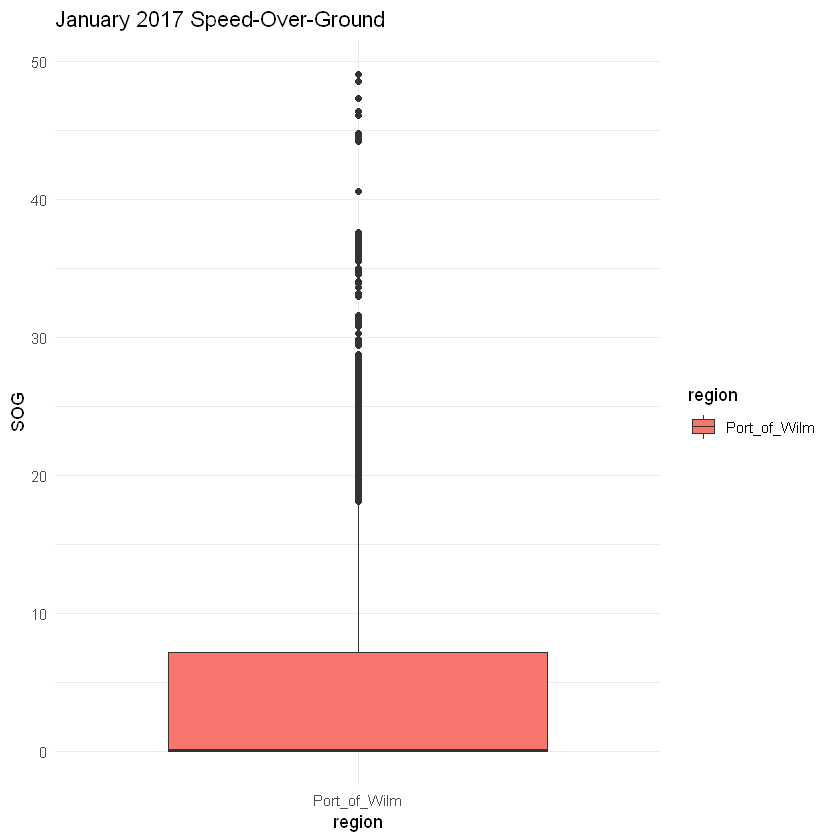

In [27]:
ggplot(Delaware_Riv_Ais_full, aes(region, SOG))+
geom_boxplot(aes(fill = region))+
ggtitle("January 2017 Speed-Over-Ground")+
theme_minimal()


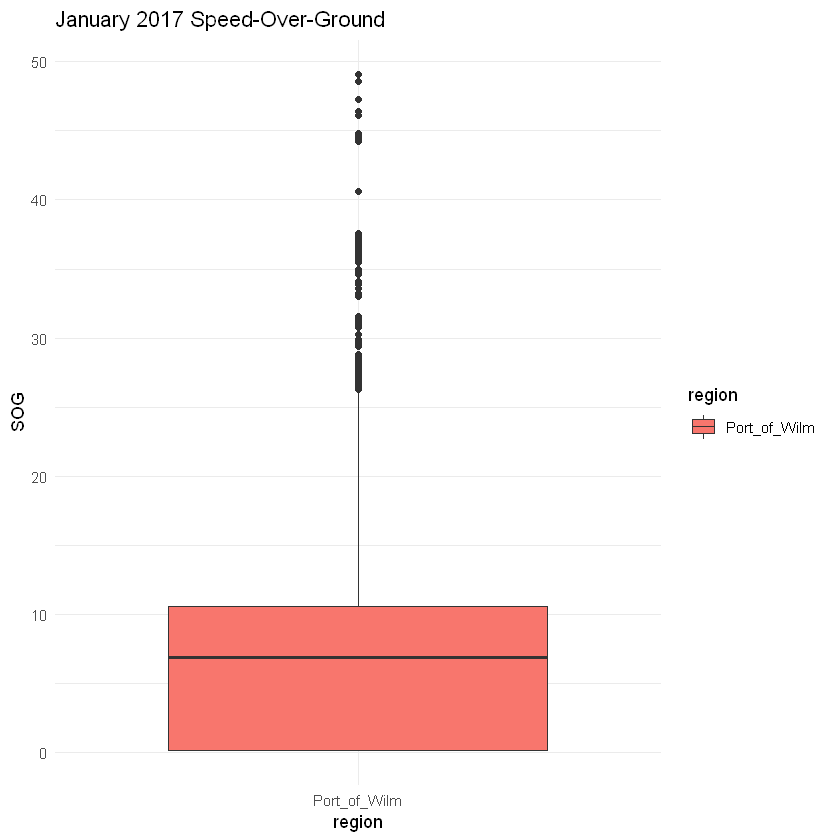

In [29]:
ggplot(data=subset(Delaware_Riv_Ais_full,SOG != 0), aes(region, SOG))+
geom_boxplot(aes(fill = region))+
ggtitle("January 2017 Speed-Over-Ground")+
theme_minimal()

Now we will look at the distribution of ships by ship type in the dataset

fct_explicit_na(AVIS.Vessel.Service),n
<fct>,<int>
Commercial Fishing Vessel,2592
Freight Ship,167183
Industrial Vessel,30267
Offshore Supply Vessel,434
Oil Recovery,13066
Passenger (Inspected),156457
Public Freight,675
"Public Vessel, Unclassified",44534
Recreational,17506


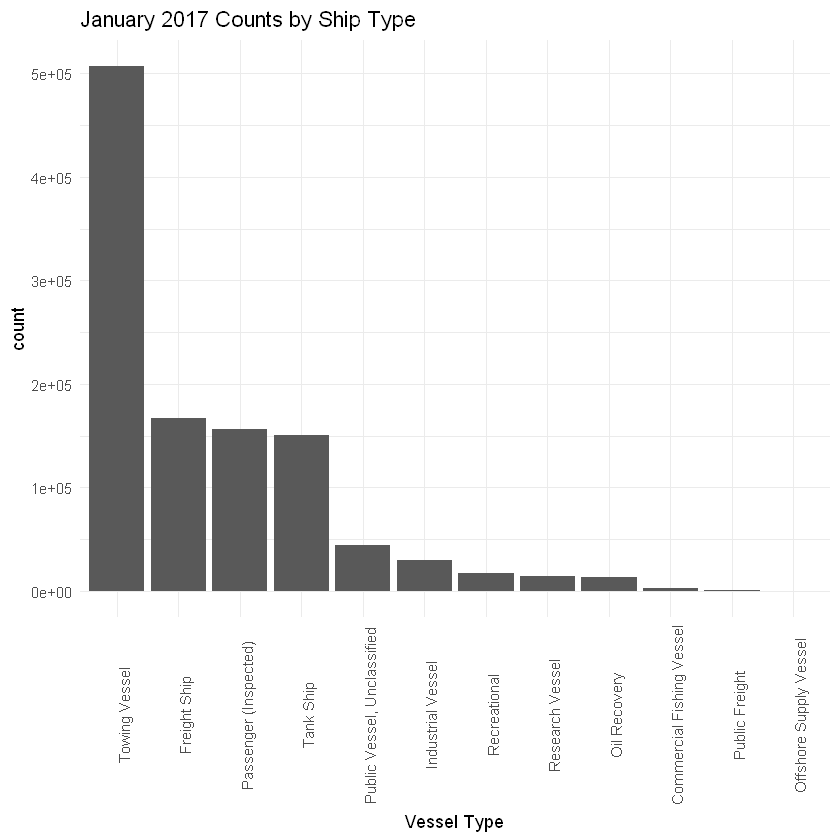

In [121]:
library(plyr)
library(forcats)
Delaware_Riv_Ais_full_joined %>% dplyr::group_by(fct_explicit_na(AVIS.Vessel.Service)) %>% dplyr::summarise(n = n())

ggplot(Delaware_Riv_Ais_full_joined)+
geom_bar(aes(x = fct_infreq(AVIS.Vessel.Service)))+
ggtitle("January 2017 Counts by Ship Type")+
theme_minimal()+
theme(axis.text.x = element_text(angle = 90))+
xlab("Vessel Type")

It looks like the vast majority of records are Towing Vessels, followed by freight ships, passenger ships, and tank ships. 

Now I wanted to look at the distribution of individual ship records, and how many counts the most active ships make.

In [129]:
Delaware_Riv_Ais_full$MMSI  <- as.factor(Delaware_Riv_Ais_full$MMSI)
Delaware_Riv_Ais_full %>% dplyr::group_by(fct_explicit_na(MMSI)) %>% dplyr::summarize(count=n()) %>% arrange(desc(count)) %>% head(20)

fct_explicit_na(MMSI),count
<fct>,<int>
367012640,37664
367699890,37022
367518270,36998
367141190,36848
367068110,35979
367100370,35681
367012670,33235
367090620,32604
367373420,31061


This shows that the top 10 ships each account for over 30,000 records! This dataset has only 1,200,000 records, and 30,000 of them, or 2.5% of the records, are made up of only 10 ships' activities